In [25]:
import pandas as pd
import numpy as np
from pandas.plotting import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')

# Loading Data

In [2]:
# Read CSVs
debtor_df = pd.read_csv("DebtorExtract.csv")
invoice_df = pd.read_csv("InvoiceExtract.csv")
payment_df = pd.read_csv("PaymentsExtract.csv")

In [3]:
dfs = {"debt": debtor_df, "invoice":invoice_df, "payment":payment_df}

In [4]:
def df_eda(df_dict):

    for df_name in df_dict:
        df = df_dict[df_name]
        print("Number of rows: " + str(len(df)))
        
        with pd.ExcelWriter(df_name + ".xlsx") as writer:
            for c in df.columns:
                #Print unique counts of columns
                print("Num unique col " + c + ': ' + str(df[c].nunique()))
                # Print description of column
                print("Description of column: " + c)
                desc = df[c].describe()
                desc.to_excel(writer, sheet_name = c)

In [5]:
print("Invoice unique customers:" + str(invoice_df["CustomerKey"].nunique()))
print("Invoice unique invoices:" + str(invoice_df["InvoiceKey"].nunique()))
print("Payment unique customers:" + str(payment_df["CustomerKey"].nunique()))
print("Payment unique invoices:" + str(payment_df["InvoiceKey"].nunique()))

Invoice unique customers:83799
Invoice unique invoices:1009327
Payment unique customers:28535
Payment unique invoices:546365


In [6]:
inv_pay = pd.merge(invoice_df, payment_df, on = ['InvoiceKey', 'CustomerKey'])

In [7]:
inv_pay

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType
0,197057173,16776992,1,2018-01-02,2018-01-02,-645.66,0.0,JRN,2020-09-18 16:21:06.333,-645.66,2018-12-17,Barclays Multi
1,196559812,16837363,1,2018-01-02,2018-01-02,-139.37,0.0,JRN,2020-09-18 16:21:06.333,-139.37,2018-11-01,Barclays Multi
2,195300967,16724474,1,2018-01-03,2018-01-03,-88.50,0.0,JRN,2020-09-18 16:21:06.333,-88.50,2018-09-24,Barclays Multi
3,195519971,16745090,0,2018-01-03,2018-03-02,168.00,0.0,INV,2020-09-18 16:21:06.333,168.00,2018-11-23,Barclays Multi
4,196697217,16817529,1,2018-01-03,2018-01-03,-626.38,0.0,JRN,2020-09-18 16:21:06.333,-626.38,2019-12-17,Barclays Multi
...,...,...,...,...,...,...,...,...,...,...,...,...
361514,196340182,16725749,0,2019-06-30,2019-07-30,95.90,0.0,INV,2020-09-18 16:21:06.333,95.90,2019-08-14,Barclays Multi
361515,196340751,16728765,0,2019-06-30,2019-07-30,406.09,0.0,INV,2020-09-18 16:21:06.333,406.09,2019-08-05,Barclays Multi
361516,196341240,16971160,0,2019-06-30,2019-07-30,130.56,0.0,INV,2020-09-18 16:21:06.333,130.56,2019-07-24,CheckM8
361517,196341411,16764236,0,2019-06-30,2019-07-30,15.00,0.0,INV,2020-09-18 16:21:06.333,15.00,2019-07-08,Barclays Multi


In [8]:
len(payment_df)

549748

In [9]:
invoice_df

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
0,197017110,16744809,1,2018-01-01,2018-08-31,-61589.70,-61589.70,CRN,2020-09-18 16:21:06.333
1,197188287,16744809,1,2018-01-01,2018-12-30,-2826.19,-2826.19,CRN,2020-09-18 16:21:06.333
2,197057183,16798371,1,2018-01-02,2018-01-02,-150.00,0.00,CSH,2020-09-18 16:21:06.333
3,195398038,16732292,0,2018-01-02,2018-02-01,485.04,0.00,INV,2020-09-18 16:21:06.333
4,197057173,16776992,1,2018-01-02,2018-01-02,-645.66,0.00,JRN,2020-09-18 16:21:06.333
...,...,...,...,...,...,...,...,...,...
1009322,196341240,16971160,0,2019-06-30,2019-07-30,130.56,0.00,INV,2020-09-18 16:21:06.333
1009323,196341244,16829160,0,2019-06-30,2019-07-30,63.60,0.00,INV,2020-09-18 16:21:06.333
1009324,196341411,16764236,0,2019-06-30,2019-07-30,15.00,0.00,INV,2020-09-18 16:21:06.333
1009325,196341507,16832368,0,2019-06-30,2019-07-30,74.76,0.00,INV,2020-09-18 16:21:06.333


In [10]:
payment_df.loc[payment_df["InvoiceKey"]==197057173]

,InvoiceKey,CustomerKey,PaymentValue,PaymentDate,PaymentType
444086,197057173,16776992,-645.66,2018-12-17,Barclays Multi


In [11]:
invoice_df.loc[invoice_df["InvoiceKey"]==197057173]

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
4,197057173,16776992,1,2018-01-02,2018-01-02,-645.66,0.0,JRN,2020-09-18 16:21:06.333


# Data Types, number of unique values, intersection of keys

In [12]:
dfs['debt'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88099 entries, 0 to 88098
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     88099 non-null  int64 
 1    PostcodeOuter  88053 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
dfs['debt'].nunique()

CustomerKey       88099
 PostcodeOuter     2756
dtype: int64

In [14]:
dfs['invoice'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009327 entries, 0 to 1009326
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   InvoiceKey                1009327 non-null  int64  
 1   CustomerKey               1009327 non-null  int64  
 2   IsCreditInvoice           1009327 non-null  int64  
 3   RaisedDate                1009327 non-null  object 
 4   DueDate                   1009327 non-null  object 
 5   OriginalInvoiceAmount     1009327 non-null  float64
 6   AmountOutstanding         1009327 non-null  float64
 7   StatementTransactionType  1009327 non-null  object 
 8   ExtractDate               1009327 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 69.3+ MB


In [15]:
dfs['invoice'].nunique()

InvoiceKey                  1009327
CustomerKey                   83799
IsCreditInvoice                   2
RaisedDate                      490
DueDate                         608
OriginalInvoiceAmount        159622
AmountOutstanding              1806
StatementTransactionType          4
ExtractDate                       1
dtype: int64

In [16]:
dfs['payment'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549748 entries, 0 to 549747
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceKey    549748 non-null  int64  
 1   CustomerKey   549748 non-null  int64  
 2   PaymentValue  549748 non-null  float64
 3   PaymentDate   549748 non-null  object 
 4   PaymentType   549748 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 21.0+ MB


In [17]:
dfs['payment'].nunique()

InvoiceKey      546365
CustomerKey      28535
PaymentValue    153475
PaymentDate        518
PaymentType          2
dtype: int64

In [18]:
print('# of Common invoicekeys shared')
len(set(dfs['payment']['InvoiceKey']) & set(dfs['invoice']['InvoiceKey']))

# of Common invoicekeys shared


359279

# Visualizations

In [19]:
df = inv_pay
del df['ExtractDate']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361519 entries, 0 to 361518
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   InvoiceKey                361519 non-null  int64  
 1   CustomerKey               361519 non-null  int64  
 2   IsCreditInvoice           361519 non-null  int64  
 3   RaisedDate                361519 non-null  object 
 4   DueDate                   361519 non-null  object 
 5   OriginalInvoiceAmount     361519 non-null  float64
 6   AmountOutstanding         361519 non-null  float64
 7   StatementTransactionType  361519 non-null  object 
 8   PaymentValue              361519 non-null  float64
 9   PaymentDate               361519 non-null  object 
 10  PaymentType               361519 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 33.1+ MB


## Correlation

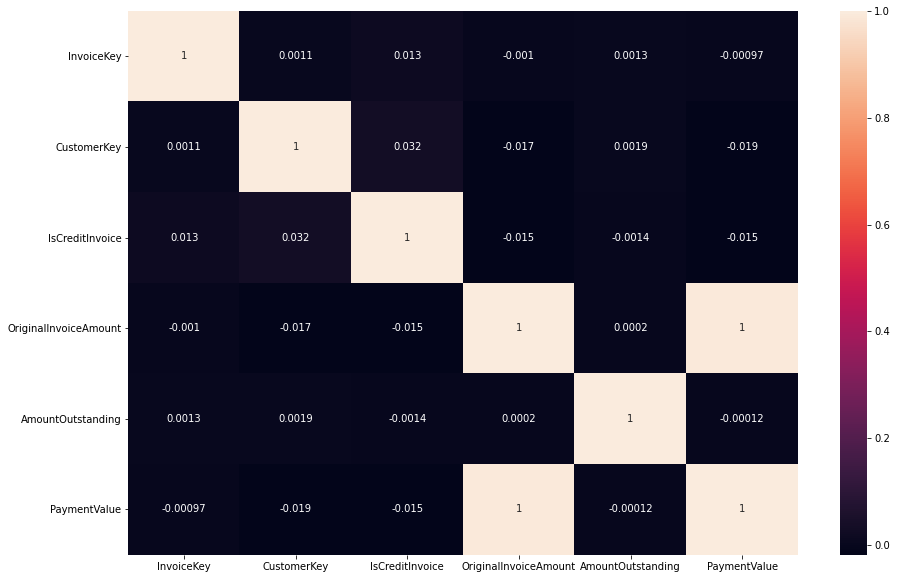

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

## Histograms

# Box Plots